In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import catboost as cb
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [70]:
# import data 
df = pd.read_csv('../Austin/Ames_House_Price_FeatureEngineered_Encoded.csv', index_col=0)

df.head()

df_old = pd.read_csv('../Austin/ames_house_price_encoded.csv')
features_old = df_old.drop(['sale_price', 'pid', 'bc_sale_price', ], axis = 1)
target_old = df_old['sale_price']
features_old.columns.to_list()

['gr_liv_area',
 'lot_frontage',
 'lot_area',
 'lot_shape',
 'utilities',
 'land_slope',
 'overall_qual',
 'overall_cond',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmt_fin_type1',
 'bsmt_fin_sf1',
 'bsmt_fin_type2',
 'bsmt_fin_sf2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abv_gr',
 'kitchen_abv_gr',
 'kitchen_qual',
 'tot_rms_abv_grd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3_ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_val',
 'mo_sold',
 'street_grvl',
 'alley_grvl',
 'alley_pave',
 'land_contour_bnk',
 'land_contour_hls',
 'land_contour_low',
 'lot_config_corner',
 'lot_config_culd

In [67]:
target = df['sale_price']
features = df.drop(['sale_price', 'pid', 'bc_sale_price', ], axis = 1)
features

,gr_liv_area,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,alley_grvl,alley_pave,land_contour_bnk,land_contour_hls,land_contour_low,lot_config_corner,lot_config_culdsac,lot_config_fr2,lot_config_fr3,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,near_rr,near_main_rd,near_pos,bldg_type_2fmcon,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1.5unf,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,roof_style_flat,roof_style_gambrel,roof_style_hip,roof_style_mansard,roof_style_shed,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_precast,exterior1st_stucco,exterior1st_wd sdng,exterior1st_wdshing,mas_vnr_type_brkcmn,mas_vnr_type_brkface,mas_vnr_type_stone,foundation_brktil,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage_type_2types,garage_type_basment,garage_type_builtin,garage_type_carport,garage_type_detchd,garage_type_na,misc_feature_gar2,misc_feature_othr,misc_feature_shed,misc_feature_tenc,sale_type_cod,sale_type_cwd,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_new,sale_type_oth,sale_type_vwd,sale_condition_abnorml,sale_condition_adjland,sale_condition_alloca,sale_condition_family,sale_condition_partial,ms_sub_class_120,ms_sub_class_150,ms_sub_class_160,ms_sub_class_180,ms_sub_class_190,ms_sub_class_30,ms_sub_class_40,ms_sub_class_45,ms_sub_class_50,ms_sub_class_60,ms_sub_class_70,ms_sub_class_75,ms_sub_class_80,ms_sub_class_85,ms_sub_class_90,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_fv,ms_zoning_i (all),ms_zoning_rh,ms_zoning_rm,house_age_at_sale,construction_age_at_sale,yr_sold_2007,yr_sold_2008,yr_sold_2009,yr_sold_2010,garage_rating,has_2nd_floor,bsmt_fin_sf,total_fin_sf,total_sf
0,856.0,80.0,7890.0,4.0,3.0,6.0,6.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,238.0,1.0,0.0,618.0,856.0,3.0,1.0,4.0,856.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,4.0,7.0,1.0,4.0,1.0,2.0,399.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,166.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,60.0,0.0,0.0,0.0,1.0,3.0,0,238.0,1094.0,1712.0
1,1049.0,42.0,4235.0,4.0,3.0,5.0,5.0,149.0,4.0,3.0,4.0,3.0,2.0,6.0,552.0,5.0,393.0,104.0,1049.0,3.0,1.0,4.0,1049.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,4.0,5.0,7.0,0.0,0.0,3.0,1.0,266.0,3.0,3.0,3.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0

In [49]:
# Define custom scaler function
def scale_feature_log_dependent(scaler, X, y):
    X_scaler = scaler
    X_scaler.fit(X=X,y=y)
    X_scaled = X_scaler.transform(X)
    
    # log transformation is good for the dependent variable
    y_scaled = np.log(y)
    
    return X_scaled, y_scaled, X_scaler


def scale_feature_only(scaler, X_train, y_train, X_test):
    X_scaler = scaler
    X_scaler.fit(X=X,y=y_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, X_scaler

In [50]:
# Define custom scaler backtransform

#def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name, error_type = 'Test'):
    
#    # test (exponentiate the y_preds rather than inverse transform given that I am not applying the same scaler to the response variable as is to the feature dataset)
#    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
#    
#    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
#    print(error_type + " " + "Error = "'{}'.format(rmse_error)+ " in " + model_name)
#    return rmse_error, y_predict

In [51]:
# Custom function to run baseline models and report error

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=False, ylog = False):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Train / Test Predictions
    y_predict_train = model.predict(X_train)
    y_predict = model.predict(X_test)
    
    if ylog:
        y_predict_train = np.exp(y_predict_train)
        y_predict = np.exp(y_predict)
        y_train = np.exp(y_train)
        y_test = np.exp(y_test)
        
        #TRAIN ylog
        train_RMSE = mean_squared_error(y_train, y_predict_train, squared=False)
        # MAPE  
        train_MAPE = mean_absolute_percentage_error(y_train, y_predict_train)*100
        # MAE
        train_MAE = mean_absolute_error(y_train, y_predict_train)
        
        # TEST ylog
        test_RMSE = mean_squared_error(y_test, y_predict, squared=False)
    
        # MAPE ylog 
        test_MAPE = mean_absolute_percentage_error(y_test, y_predict)*100
        # MAE
        test_MAE = mean_absolute_error(y_test, y_predict)
    
    #TRAIN
    train_RMSE = mean_squared_error(y_train, y_predict_train, squared=False)
    # MAPE
    train_MAPE = mean_absolute_percentage_error(y_train, y_predict_train)*100
    # MAE
    train_MAE = mean_absolute_error(y_train, y_predict_train)
    
    # TEST
    test_RMSE = mean_squared_error(y_test, y_predict, squared=False)
    
    # MAPE ylog 
    test_MAPE = mean_absolute_percentage_error(y_test, y_predict)*100
    # MAE
    test_MAE = mean_absolute_error(y_test, y_predict)
    
    if verbose:
        print("Train RMSE = "'{}'.format(train_RMSE)+" in " + model_name)
        print("Test RMSE = "'{}'.format(test_RMSE)+" in " + model_name)
        print("Train MAPE = "'{}'.format(train_MAPE)+" in " + model_name)
        print("Test MAPE = "'{}'.format(test_MAPE)+" in " + model_name)
        print("Train MAE = "'{}'.format(train_MAE)+" in " + model_name)
        print("Test MAE = "'{}'.format(test_MAE)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, y_predict_train, train_RMSE, test_RMSE, train_MAPE, test_MAPE, train_MAE, test_MAE

In [54]:
# scale or not scale dependent variable

y = np.log(target_old)
ylog = True

# Define an empty prediction dictionary
pred_dict = {
    'regression_model':[],
    'scaler_name':[],
    'feature_set':[],
    'Train RMSE': [],
    'Test RMSE':[],
    'Train MAPE':[],
    'Test MAPE':[],
    'Train MAE':[],
    'Test MAE': []
}

# List the regression models for testing
regression_models = {
    #"MLR": linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(), # expect feature set to be normalized
    #"Lasso": linear_model.Lasso(max_iter = 10000), # expect feature set to be normalized
    #"Elastic-Net": linear_model.ElasticNet(), # expect feature set to be normalized
    
    # Tree based models
    #"RandomForest": RandomForestRegressor(n_estimators=500, max_depth = 10),
    # Gradient Boosted
    "XGBoost": XGBRegressor(n_estimators=500, max_depth = 10, learning_rate = 0.1),
    "CatBoost": cb.CatBoostRegressor(n_estimators=500,verbose=False, depth = 10,learning_rate = 0.1),
    "LGBM": LGBMRegressor(n_estimators=500, max_depth = 10, learning_rate = 0.1),
    #"AdaBoost": AdaBoostRegressor(n_estimators=500, learning_rate = 0.05)
}


# FEATURE SET SCALERS
scalers = {
    'NotScale': None,
    'Standard': StandardScaler(),
    'yeo-johnson': PowerTransformer(),
#    'MinMax': MinMaxScaler(), # not normally applied to dependent variable, performs the poorest so will eliminate


}


# Define some feature subsets
# all features before feature reduction
features_all = ['overall_qual', 'gr_liv_area', '1st_flr_sf', 'total_bsmt_sf', 'garage_area', 'bsmt_fin_sf1', 'lot_area', 'house_age_at_sale', 'construction_age_at_sale', 'garage_cars', 'mas_vnr_area', 'bsmt_qual', '2nd_flr_sf', 'bsmt_fin_type1', 'kitchen_qual', 'lot_frontage', 'garage_finish', 'bsmt_unf_sf', 'overall_cond', 'open_porch_sf', 'tot_rms_abv_grd', 'wood_deck_sf', 'bsmt_exposure', 'mo_sold', 'fireplace_qu', 'screen_porch', 'fireplaces', 'full_bath', 'ms_zoning_rm', 'exter_qual', 'bsmt_full_bath', 'central_air', 'heating_qc', 'bedroom_abv_gr', 'garage_type_detchd', 'lot_shape', 'half_bath', 'ms_sub_class_60', 'neighborhood_crawfor', 'enclosed_porch', 'roof_style_hip', 'land_slope', 'bsmt_cond', 'exterior1st_metalsd', 'sale_condition_family', 'functional', 'foundation_pconc', 'yr_sold_2007', 'paved_drive', 'lot_config_corner', 'bsmt_fin_sf2', 'yr_sold_2008', 'yr_sold_2009', 'garage_cond', 'fence', 'exter_cond', 'land_contour_hls', 'exterior1st_wd sdng', 'mas_vnr_type_stone', 'bsmt_fin_type2', 'neighborhood_noridge', 'neighborhood_collgcr', 'kitchen_abv_gr', 'near_main_rd', 'exterior1st_hdboard', 'lot_config_culdsac', 'mas_vnr_type_brkface', 'neighborhood_oldtown', 'roof_style_mansard', 'yr_sold_2010', 'exterior1st_cemntbd', 'sale_condition_partial', 'sale_type_new', 'ms_sub_class_30', 'exterior1st_brkface', 'garage_qual', 'neighborhood_edwards', 'house_style_1.5fin', 'neighborhood_stonebr', 'neighborhood_veenker', 'foundation_brktil', 'neighborhood_somerst', 'bsmt_half_bath', 'sale_condition_abnorml', 'neighborhood_nridght', 'house_style_2story', 'neighborhood_nwames', 'ms_zoning_fv', 'near_pos', 'ms_sub_class_70', 'land_contour_low', 'neighborhood_clearcr', 'alley_pave', 'ms_sub_class_75', 'exterior1st_plywood', 'electrical', 'neighborhood_sawyerw', '3_ssn_porch', 'ms_sub_class_50', 'neighborhood_timber', 'house_style_2.5unf', 'neighborhood_gilbert', 'low_qual_fin_sf', 'roof_style_flat', 'neighborhood_grnhill', 'house_style_slvl', 'ms_sub_class_120', 'land_contour_bnk', 'neighborhood_mitchel', 'near_rr', 'ms_sub_class_90', 'bldg_type_twnhse', 'neighborhood_sawyer', 'sale_type_oth', 'roof_style_gambrel', 'lot_config_fr3', 'garage_type_builtin', 'alley_grvl', 'neighborhood_brkside', 'lot_config_fr2', 'ms_sub_class_80', 'misc_feature_shed', 'foundation_slab', 'misc_val', 'ms_sub_class_190', 'sale_type_cod', 'ms_zoning_rh', 'garage_type_na', 'exterior1st_precast', 'neighborhood_swisu', 'neighborhood_idotrr', 'bldg_type_duplex', 'exterior1st_stucco', 'bldg_type_twnhs', 'neighborhood_npkvill', 'bldg_type_2fmcon', 'exterior1st_wdshing', 'house_style_2.5fin', 'ms_sub_class_160', 'exterior1st_asbshng', 'pool_area', 'ms_zoning_c (all)', 'house_style_sfoyer', 'neighborhood_meadowv', 'ms_sub_class_85', 'sale_type_conld', 'garage_type_2types', 'sale_type_conlw', 'mas_vnr_type_brkcmn', 'exterior1st_brkcomm', 'garage_type_carport', 'sale_type_con', 'garage_type_basment', 'ms_sub_class_40', 'sale_type_cwd', 'roof_style_shed', 'misc_feature_gar2', 'ms_sub_class_45', 'exterior1st_asphshn', 'neighborhood_blmngtn', 'neighborhood_brdale', 'sale_type_conli', 'foundation_stone', 'house_style_1.5unf', 'neighborhood_blueste', 'sale_condition_alloca', 'neighborhood_greens', 'foundation_wood', 'ms_zoning_a (agr)', 'neighborhood_landmrk', 'misc_feature_othr', 'exterior1st_imstucc', 'exterior1st_cblock', 'ms_zoning_i (all)', 'ms_sub_class_180', 'misc_feature_tenc', 'sale_type_vwd', 'sale_condition_adjland', 'ms_sub_class_150']

# removed features with variance threshold below 0.01
reduced_var = ['overall_qual', 'gr_liv_area', '1st_flr_sf', 'total_bsmt_sf', 'garage_area', 'bsmt_fin_sf1', 'house_age_at_sale', 'construction_age_at_sale', 'mas_vnr_area', 'garage_cars', 'bsmt_qual', '2nd_flr_sf', 'bsmt_unf_sf', 'kitchen_qual', 'bsmt_fin_type1', 'garage_finish', 'overall_cond', 'tot_rms_abv_grd', 'mo_sold', 'bsmt_exposure', 'fireplaces', 'fireplace_qu', 'full_bath', 'ms_zoning_rm', 'exter_qual', 'heating_qc', 'bsmt_full_bath', 'bedroom_abv_gr', 'half_bath', 'lot_shape', 'central_air', 'neighborhood_crawfor', 'garage_type_detchd', 'ms_sub_class_60', 'bsmt_cond', 'land_slope', 'yr_sold_2007', 'functional', 'roof_style_hip', 'fence', 'bsmt_fin_sf2', 'foundation_pconc', 'exterior1st_metalsd', 'land_contour_hls', 'yr_sold_2008', 'bsmt_fin_type2', 'lot_config_culdsac', 'paved_drive', 'yr_sold_2009', 'exterior1st_cemntbd', 'lot_config_corner', 'garage_cond', 'mas_vnr_type_stone', 'neighborhood_collgcr', 'exterior1st_hdboard', 'neighborhood_oldtown', 'bsmt_half_bath', 'near_main_rd', 'exterior1st_brkface', 'mas_vnr_type_brkface', 'neighborhood_edwards', 'yr_sold_2010', 'exterior1st_wd sdng', 'sale_type_new', 'near_pos', 'garage_qual', 'ms_sub_class_30', 'neighborhood_stonebr', 'alley_pave', 'land_contour_low', 'sale_condition_partial', 'sale_condition_abnorml', 'foundation_brktil', 'house_style_2story', 'neighborhood_clearcr', 'neighborhood_somerst', 'house_style_1.5fin', 'neighborhood_noridge', 'ms_sub_class_50', 'neighborhood_nridght', 'neighborhood_nwames', 'exterior1st_plywood', 'electrical', 'ms_zoning_fv', 'neighborhood_sawyerw', 'neighborhood_timber', 'neighborhood_sawyer', 'neighborhood_gilbert', 'bldg_type_twnhse', 'ms_sub_class_70', 'ms_sub_class_90', 'near_rr', 'ms_sub_class_120', 'garage_type_builtin', 'neighborhood_brkside', 'land_contour_bnk', 'bldg_type_duplex', 'lot_config_fr2', 'ms_sub_class_160', 'alley_grvl', 'neighborhood_mitchel', 'ms_sub_class_80', 'house_style_slvl', 'misc_feature_shed', 'neighborhood_idotrr', 'exterior1st_wdshing', 'ms_sub_class_190', 'sale_type_cod', 'garage_type_na', 'exterior1st_stucco', 'neighborhood_swisu', 'foundation_slab', 'bldg_type_twnhs', 'house_style_sfoyer', 'bldg_type_2fmcon', 'exterior1st_asbshng', 'ms_sub_class_85', 'neighborhood_meadowv', 'neighborhood_brdale', 'garage_type_basment']

# removed/engineering features to reduce colinearity below 0.75 (r-value)
corr_75 = ['overall_qual', 'gr_liv_area', 'bsmt_fin_sf', 'garage_area', 'house_age_at_sale', 'mas_vnr_area', 'bsmt_qual', 'construction_age_at_sale', 'bsmt_unf_sf', 'fireplaces', 'mo_sold', 'garage_finish', 'kitchen_qual', 'exter_qual', 'overall_cond', 'bsmt_fin_type1', 'bsmt_exposure', 'full_bath', 'ms_zoning_rm', 'heating_qc', 'central_air', 'bedroom_abv_gr', 'half_bath', 'lot_shape', 'has_2nd_floor', 'garage_type_detchd', 'neighborhood_crawfor', 'garage_rating', 'bsmt_full_bath', 'roof_style_hip', 'exterior1st_hdboard', 'functional', 'foundation_pconc', 'lot_config_culdsac', 'sale_type_new', 'yr_sold_2007', 'neighborhood_stonebr', 'bsmt_cond', 'land_slope', 'fence', 'exterior1st_brkface', 'exterior1st_wd sdng', 'neighborhood_noridge', 'bsmt_fin_type2', 'land_contour_hls', 'mas_vnr_type_stone', 'paved_drive', 'exterior1st_cemntbd', 'yr_sold_2010', 'yr_sold_2009', 'yr_sold_2008', 'mas_vnr_type_brkface', 'exterior1st_metalsd', 'lot_config_corner', 'neighborhood_somerst', 'alley_pave', 'neighborhood_edwards', 'neighborhood_clearcr', 'neighborhood_oldtown', 'house_style_1.5fin', 'near_pos', 'land_contour_low', 'near_main_rd', 'bsmt_half_bath', 'foundation_brktil', 'neighborhood_collgcr', 'neighborhood_nwames', 'neighborhood_timber', 'neighborhood_nridght', 'sale_condition_abnorml', 'garage_type_builtin', 'bldg_type_twnhse', 'neighborhood_sawyerw', 'electrical', 'bldg_type_twnhs', 'exterior1st_plywood', 'bldg_type_duplex', 'lot_config_fr2', 'neighborhood_sawyer', 'house_style_slvl', 'near_rr', 'land_contour_bnk', 'neighborhood_brkside', 'neighborhood_mitchel', 'neighborhood_meadowv', 'neighborhood_swisu', 'neighborhood_idotrr', 'neighborhood_gilbert', 'bldg_type_2fmcon', 'alley_grvl', 'misc_feature_shed', 'sale_type_cod', 'foundation_slab', 'house_style_sfoyer', 'exterior1st_stucco', 'exterior1st_wdshing', 'neighborhood_brdale', 'exterior1st_asbshng', 'garage_type_basment']

# using VIF (variance inflation factor), reduced/engineered features so that VIF threshold is below 80
vif_80 = ['overall_qual', 'gr_liv_area', 'bsmt_fin_sf', 'garage_area', 'house_age_at_sale', 'mas_vnr_area', 'bsmt_qual', 'construction_age_at_sale', 'bsmt_unf_sf', 'fireplaces', 'kitchen_qual', 'mo_sold', 'garage_finish', 'overall_cond', 'bsmt_fin_type1', 'bsmt_exposure', 'ms_zoning_rm', 'full_bath', 'heating_qc', 'central_air', 'bedroom_abv_gr', 'half_bath', 'has_2nd_floor', 'garage_type_detchd', 'neighborhood_crawfor', 'bsmt_full_bath', 'garage_rating', 'roof_style_hip', 'foundation_pconc', 'sale_type_new', 'exterior1st_hdboard', 'lot_config_culdsac', 'neighborhood_noridge', 'yr_sold_2007', 'lot_config_corner', 'bsmt_fin_type2', 'exterior1st_brkface', 'fence', 'land_contour_hls', 'exterior1st_metalsd', 'neighborhood_stonebr', 'yr_sold_2010', 'near_pos', 'exterior1st_wd sdng', 'yr_sold_2008', 'mas_vnr_type_stone', 'neighborhood_somerst', 'yr_sold_2009', 'neighborhood_clearcr', 'neighborhood_edwards', 'mas_vnr_type_brkface', 'house_style_1.5fin', 'exterior1st_cemntbd', 'bsmt_half_bath', 'foundation_brktil', 'garage_type_builtin', 'alley_pave', 'neighborhood_oldtown', 'neighborhood_collgcr', 'neighborhood_nwames', 'near_main_rd', 'neighborhood_nridght', 'land_contour_low', 'sale_condition_abnorml', 'bldg_type_twnhse', 'bldg_type_twnhs', 'neighborhood_timber', 'neighborhood_sawyerw', 'land_contour_bnk', 'exterior1st_plywood', 'bldg_type_duplex', 'house_style_slvl', 'lot_config_fr2', 'near_rr', 'neighborhood_sawyer', 'bldg_type_2fmcon', 'neighborhood_brkside', 'neighborhood_mitchel', 'neighborhood_meadowv', 'neighborhood_gilbert', 'neighborhood_idotrr', 'alley_grvl', 'neighborhood_swisu', 'misc_feature_shed', 'sale_type_cod', 'foundation_slab', 'exterior1st_stucco', 'house_style_sfoyer', 'exterior1st_wdshing', 'neighborhood_brdale', 'exterior1st_asbshng', 'garage_type_basment']


# using VIF (variance inflation factor), reduced/engineered features so that VIF threshold is below 50
vif_50 = ['total_fin_sf', 'house_age_at_sale', 'garage_area', 'bsmt_unf_sf', 'construction_age_at_sale', 'mas_vnr_area', 'fireplaces', 'overall_cond', 'full_bath', 'mo_sold', 'bsmt_exposure', 'central_air', 'bsmt_fin_type1', 'bedroom_abv_gr', 'garage_finish', 'neighborhood_crawfor', 'heating_qc', 'roof_style_hip', 'garage_rating', 'garage_type_detchd', 'neighborhood_stonebr', 'half_bath', 'land_contour_hls', 'neighborhood_noridge', 'exterior1st_metalsd', 'bsmt_full_bath', 'exterior1st_brkface', 'ms_zoning_rm', 'yr_sold_2007', 'lot_config_culdsac', 'neighborhood_somerst', 'exterior1st_cemntbd', 'bsmt_fin_type2', 'fence', 'yr_sold_2008', 'lot_config_corner', 'neighborhood_nridght', 'neighborhood_sawyerw', 'near_pos', 'yr_sold_2009', 'mas_vnr_type_brkface', 'has_2nd_floor', 'near_main_rd', 'exterior1st_hdboard', 'bldg_type_twnhse', 'land_contour_low', 'neighborhood_edwards', 'sale_condition_abnorml', 'yr_sold_2010', 'neighborhood_clearcr', 'neighborhood_sawyer', 'neighborhood_nwames', 'neighborhood_collgcr', 'sale_type_new', 'exterior1st_wd sdng', 'bsmt_half_bath', 'bldg_type_duplex', 'mas_vnr_type_stone', 'land_contour_bnk', 'foundation_pconc', 'house_style_1.5fin', 'exterior1st_plywood', 'foundation_brktil', 'neighborhood_meadowv', 'neighborhood_timber', 'neighborhood_oldtown', 'garage_type_builtin', 'alley_pave', 'house_style_slvl', 'lot_config_fr2', 'near_rr', 'neighborhood_mitchel', 'exterior1st_wdshing', 'neighborhood_brkside', 'bldg_type_twnhs', 'neighborhood_idotrr', 'neighborhood_gilbert', 'sale_type_cod', 'bldg_type_2fmcon', 'house_style_sfoyer', 'alley_grvl', 'exterior1st_stucco', 'misc_feature_shed', 'neighborhood_swisu', 'neighborhood_brdale', 'exterior1st_asbshng', 'foundation_slab', 'garage_type_basment']


feature_sets = {
    "full": features_all,
    'reduced_var': reduced_var,
    'corr_75': corr_75,
    'vif_80': vif_80,
    'vif_50': vif_50
}

feature_sets = {
    "full_old": features_old.columns.to_list()
}

In [38]:
features

,gr_liv_area,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,alley_grvl,alley_pave,land_contour_bnk,land_contour_hls,land_contour_low,lot_config_corner,lot_config_culdsac,lot_config_fr2,lot_config_fr3,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,near_rr,near_main_rd,near_pos,bldg_type_2fmcon,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1.5unf,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,roof_style_flat,roof_style_gambrel,roof_style_hip,roof_style_mansard,roof_style_shed,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_precast,exterior1st_stucco,exterior1st_wd sdng,exterior1st_wdshing,mas_vnr_type_brkcmn,mas_vnr_type_brkface,mas_vnr_type_stone,foundation_brktil,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,garage_type_2types,garage_type_basment,garage_type_builtin,garage_type_carport,garage_type_detchd,garage_type_na,misc_feature_gar2,misc_feature_othr,misc_feature_shed,misc_feature_tenc,sale_type_cod,sale_type_cwd,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_new,sale_type_oth,sale_type_vwd,sale_condition_abnorml,sale_condition_adjland,sale_condition_alloca,sale_condition_family,sale_condition_partial,ms_sub_class_120,ms_sub_class_150,ms_sub_class_160,ms_sub_class_180,ms_sub_class_190,ms_sub_class_30,ms_sub_class_40,ms_sub_class_45,ms_sub_class_50,ms_sub_class_60,ms_sub_class_70,ms_sub_class_75,ms_sub_class_80,ms_sub_class_85,ms_sub_class_90,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_fv,ms_zoning_i (all),ms_zoning_rh,ms_zoning_rm,house_age_at_sale,construction_age_at_sale,yr_sold_2007,yr_sold_2008,yr_sold_2009,yr_sold_2010,garage_rating,has_2nd_floor,bsmt_fin_sf,total_fin_sf,total_sf
0,856.0,80.0,7890.0,4.0,3.0,6.0,6.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,238.0,1.0,0.0,618.0,856.0,3.0,1.0,4.0,856.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,4.0,7.0,1.0,4.0,1.0,2.0,399.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,166.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,60.0,0.0,0.0,0.0,1.0,3.0,0,238.0,1094.0,1712.0
1,1049.0,42.0,4235.0,4.0,3.0,5.0,5.0,149.0,4.0,3.0,4.0,3.0,2.0,6.0,552.0,5.0,393.0,104.0,1049.0,3.0,1.0,4.0,1049.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,4.0,5.0,7.0,0.0,0.0,3.0,1.0,266.0,3.0,3.0,3.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0

In [55]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    # subset X based on the current feature set
    X = features_old[feature_set]
    
    # Perform train / test / split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
    
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
        print("")
        
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                _, _, _, train_RMSE, test_RMSE, train_MAPE, test_MAPE, train_MAE, test_MAE = \
                    make_regression(X_train, y_train, X_test, y_test, \
                                    regression_models[model_name], model_name, ylog=ylog)
                
            else:
                X_train_scaled, X_test_scaled, X_scaler = \
                    scale_feature_only(scalers[scaler_name], X_train, y_train, X_test)
                
                # Run model
                _, _, _, train_RMSE, test_RMSE, train_MAPE, test_MAPE, train_MAE, test_MAE = \
                    make_regression(X_train_scaled, y_train, X_test_scaled, \
                                    y_test, regression_models[model_name], model_name, ylog=ylog)
            
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["Train RMSE"].append(train_RMSE)
            pred_dict["Test RMSE"].append(test_RMSE)
            pred_dict["Train MAPE"].append(train_MAPE)
            pred_dict["Test MAPE"].append(test_MAPE)
            pred_dict["Train MAE"].append(train_MAE)
            pred_dict["Test MAE"].append(test_MAE)

-----scaled with NotScale----- included columns are full_old

-----scaled with Standard----- included columns are full_old

-----scaled with yeo-johnson----- included columns are full_old



/Users/eihwood/opt/miniforge3/envs/boost/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/eihwood/opt/miniforge3/envs/boost/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/eihwood/opt/miniforge3/envs/boost/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/eihwood/opt/miniforge3/envs/boost/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/eihwood/opt/miniforge3/envs/boost/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/eihwood/opt/miniforge3/envs/boo

In [58]:
pred_old = pd.DataFrame(pred_dict)

In [40]:
if ylog:
    pred_df_logy = pd.DataFrame(pred_dict)
    # Append a string to each row in a the scaler_name column
    column_name = 'scaler_name'
    suffix = '_logy'
    pred_df_logy[column_name] = pred_df_logy[column_name].apply(lambda x: x + suffix)

else:
    pred_df = pd.DataFrame(pred_dict)


pred_df_logy

,regression_model,scaler_name,feature_set,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train MAE,Test MAE
0,Ridge,NotScale_logy,full,15454.259009,17866.503014,6.497475,7.028428,10915.826840,12489.690905
1,XGBoost,NotScale_logy,full,230.475734,21431.717527,0.087983,7.149583,145.735271,13079.227768
2,CatBoost,NotScale_logy,full,1701.495133,20830.920882,0.726571,6.997083,1238.777861,12741.835139
3,LGBM,NotScale_logy,full,1504.377055,20697.735945,0.603720,7.380459,1007.410367,13301.151668
4,Ridge,Standard_logy,full,15248.355543,17660.547443,6.430773,7.063668,10788.090788,12445.376617
5,XGBoost,Standard_logy,full,230.475734,21421.735808,0.087983,7.155382,145.735271,13085.251453
6,CatBoost,Standard_logy,full,1701.495133,20833.365253,0.726571,7.000240,1238.777861,12746.567430
7,LGBM,Standard_logy,full,1452.376645,20558.078559,0.577143,7.316322,966.170655,13270.663256
8,Ridge,yeo-johnson_logy,full,16178.741182,18439.567461,6.346426,6.942757,10939.784325,12330.292506
9,XGBoost,yeo-johnson_logy,full,227.565511,21572.089371,0.088492,7.162311,146.258953,13188.947414


In [59]:
pred_df_combined = pd.concat([pred_old, pred_df_logy]).reset_index(drop=True)# Concatenate or bind rows using concat()


## Plot Test RMSE

In [17]:
help(PowerTransformer)

Help on class PowerTransformer in module sklearn.preprocessing._data:

class PowerTransformer(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)
 |  
 |  Apply a power transform featurewise to make data more Gaussian-like.
 |  
 |  Power transforms are a family of parametric, monotonic transformations
 |  that are applied to make data more Gaussian-like. This is useful for
 |  modeling issues related to heteroscedasticity (non-constant variance),
 |  or other situations where normality is desired.
 |  
 |  Currently, PowerTransformer supports the Box-Cox transform and the
 |  Yeo-Johnson transform. The optimal parameter for stabilizing variance and
 |  minimizing skewness is estimated through maximum likelihood.
 |  
 |  Box-Cox requires input data to be strictly positive, while Yeo-Johnson
 |  supports both positive or negative data.
 |  
 |  By default, zero-mean, uni

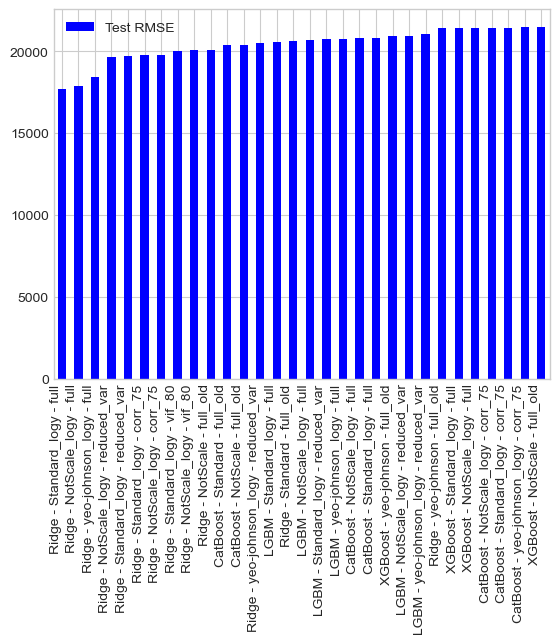

In [64]:
# Sort the DataFrame by 'Test RMSE' in ascending order
sorted_df = pred_df_combined.sort_values('Test RMSE').iloc[0:10,:]

# Create the bar plot
ax = sorted_df[['regression_model', 'scaler_name', 'feature_set','Test RMSE']].plot(kind='bar', color='blue')

# Set the x-tick labels
x_labels = sorted_df.apply(lambda x: f"{x['regression_model']} - {x['scaler_name']} - {x['feature_set']}", axis=1).tolist()
ax.set_xticklabels(x_labels, rotation=90, ha='right')

#ax.title('R')

# Display the plot
plt.show()

## Plot Test MAPE

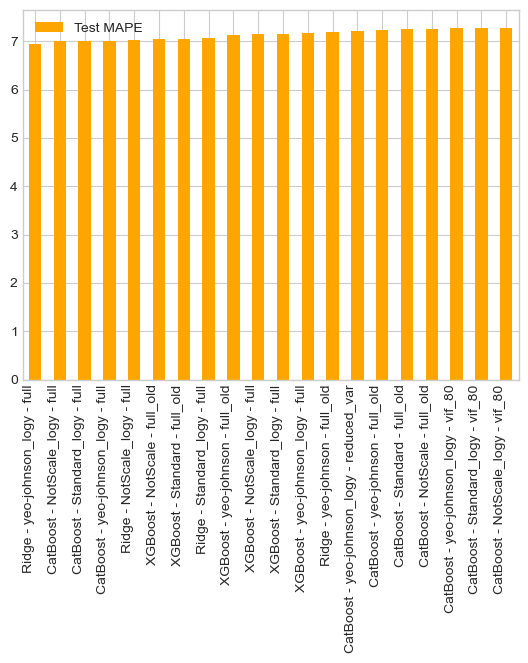

In [65]:
# Sort the DataFrame by 'Test RMSE' in ascending order
sorted_df = pred_df_combined.sort_values('Test MAPE').iloc[0:10,:]

# Create the bar plot
ax = sorted_df[['regression_model', 'scaler_name', 'feature_set','Test MAPE']].plot(kind='bar', color='orange')

# Set the x-tick labels
x_labels = sorted_df.apply(lambda x: f"{x['regression_model']} - {x['scaler_name']} - {x['feature_set']}", axis=1).tolist()
ax.set_xticklabels(x_labels, rotation=90, ha='right')

#ax.title('R')

# Display the plot
plt.show()

## Plot Test MAE

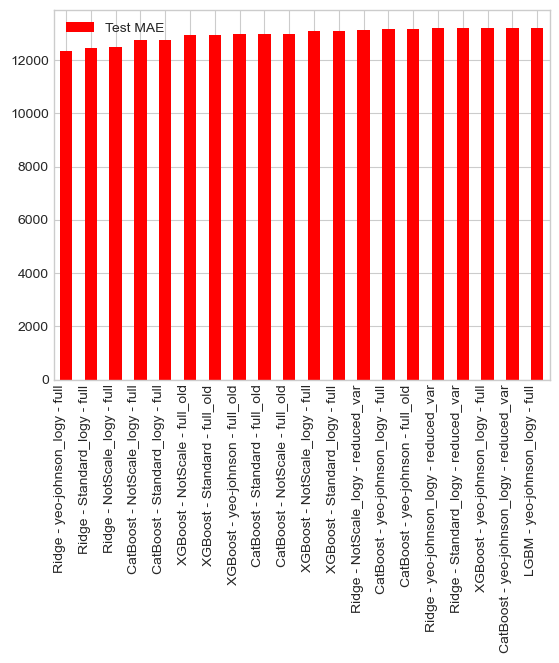

In [66]:
# Sort the DataFrame by 'Test RMSE' in ascending order
sorted_df = pred_df_combined.sort_values('Test MAE').iloc[0:10,:]

# Create the bar plot
ax = sorted_df[['regression_model', 'scaler_name', 'Test MAE']].plot(kind='bar', color='red')

# Set the x-tick labels
x_labels = sorted_df.apply(lambda x: f"{x['regression_model']} - {x['scaler_name']} - {x['feature_set']}", axis=1).tolist()
ax.set_xticklabels(x_labels, rotation=90, ha='right')

#ax.title('R')

# Display the plot
plt.show()